In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
inbound = pd.read_csv('../Data/Inbound.csv')
outbound = pd.read_csv('../Data/outbound.csv')
inventory = pd.read_csv('../Data/inventory.csv')
operation = pd.read_csv('../Data/operationCost.csv')
material = pd.read_csv('../Data/materialMaster.csv')

In [4]:
inventory.head()

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESRICTED_STOCK,STOCK_UNIT,STOCK_SELL_VALUE,CURRENCY
0,12/31/2023,CHINA-WAREHOUSE,MAT-0045,SCRAP,164,KG,211,CNY
1,12/31/2023,CHINA-WAREHOUSE,MAT-0193,6024,0,KG,87666,CNY
2,12/31/2023,CHINA-WAREHOUSE,MAT-0193,5755,70720,KG,414419,CNY
3,12/31/2023,CHINA-WAREHOUSE,MAT-0193,3142,12240,KG,71726,CNY
4,12/31/2023,CHINA-WAREHOUSE,MAT-0193,6734,2720,KG,15939,CNY


In [5]:
inventory[inventory['BALANCE_AS_OF_DATE'] == '12/31/2024'].head()

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESRICTED_STOCK,STOCK_UNIT,STOCK_SELL_VALUE,CURRENCY
14029,12/31/2024,CHINA-WAREHOUSE,MAT-0045,SCRAP,180,KG,232,CNY
14030,12/31/2024,CHINA-WAREHOUSE,MAT-0417,9242A,650,KG,1866,CNY
14031,12/31/2024,CHINA-WAREHOUSE,MAT-0417,5483A,18200,KG,52234,CNY
14032,12/31/2024,CHINA-WAREHOUSE,MAT-0417,4458A,18850,KG,54100,CNY
14033,12/31/2024,CHINA-WAREHOUSE,MAT-0128,SCRAP,14,KG,51,CNY


In [6]:
len(inventory[inventory['PLANT_NAME'] == 'SINGAPORE-WAREHOUSE']['MATERIAL_NAME'].unique())

267

In [7]:
inventory.head(10)

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESRICTED_STOCK,STOCK_UNIT,STOCK_SELL_VALUE,CURRENCY
0,12/31/2023,CHINA-WAREHOUSE,MAT-0045,SCRAP,164,KG,211,CNY
1,12/31/2023,CHINA-WAREHOUSE,MAT-0193,6024,0,KG,87666,CNY
2,12/31/2023,CHINA-WAREHOUSE,MAT-0193,5755,70720,KG,414419,CNY
3,12/31/2023,CHINA-WAREHOUSE,MAT-0193,3142,12240,KG,71726,CNY
4,12/31/2023,CHINA-WAREHOUSE,MAT-0193,6734,2720,KG,15939,CNY
5,12/31/2023,CHINA-WAREHOUSE,MAT-0311,SCRAP,4142,KG,25018,CNY
6,12/31/2023,CHINA-WAREHOUSE,MAT-0374,5995C5416,1000,KG,6430,CNY
7,12/31/2023,CHINA-WAREHOUSE,MAT-0374,8466C2971,15125,KG,97254,CNY
8,12/31/2023,CHINA-WAREHOUSE,MAT-0374,8143C2373,32975,KG,212029,CNY
9,12/31/2023,CHINA-WAREHOUSE,MAT-0046,9532,15125,KG,97254,CNY


In [8]:
inventory[inventory['BATCH_NUMBER'] == '3142']

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESRICTED_STOCK,STOCK_UNIT,STOCK_SELL_VALUE,CURRENCY
3,12/31/2023,CHINA-WAREHOUSE,MAT-0193,3142,12240,KG,71726,CNY


In [9]:
temp_inv = inventory[inventory['PLANT_NAME'] == 'SINGAPORE-WAREHOUSE']

In [10]:
temp_inv[temp_inv['MATERIAL_NAME'] == 'MAT-0016']

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESRICTED_STOCK,STOCK_UNIT,STOCK_SELL_VALUE,CURRENCY


In [11]:
inventory_grouped = inventory.groupby(['MATERIAL_NAME']).agg(
    total_quantity=('UNRESRICTED_STOCK', 'sum'),
    total_cost=('STOCK_SELL_VALUE', 'sum')
).reset_index().sort_values(by='total_quantity', ascending=True)

inventory_grouped[inventory_grouped['MATERIAL_NAME'] == 'MAT-0045']

,MATERIAL_NAME,total_quantity,total_cost
44,MAT-0045,2826,3097


In [12]:
# Scraps
inventory_scrap = inventory[inventory['BATCH_NUMBER'] == 'SCRAP']


inventory_scrap_merged = inventory_scrap.merge(
    material[['MATERIAL_NAME', 'SHELF_LIFE_IN_MONTH']],
    on='MATERIAL_NAME',
    how='left'
).drop(columns=['STOCK_UNIT', 'CURRENCY', 'BATCH_NUMBER'])

inventory_scrap_merged.sort_values(by='BALANCE_AS_OF_DATE')

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,UNRESRICTED_STOCK,STOCK_SELL_VALUE,SHELF_LIFE_IN_MONTH
32,1/31/2024,CHINA-WAREHOUSE,MAT-0279,1654,3424,3
22,1/31/2024,CHINA-WAREHOUSE,MAT-0257,5164,10482,8
23,1/31/2024,CHINA-WAREHOUSE,MAT-0258,11187,65558,9
24,1/31/2024,CHINA-WAREHOUSE,MAT-0100,5143,31063,5
25,1/31/2024,CHINA-WAREHOUSE,MAT-0095,1685,2325,9
...,...,...,...,...,...,...
208,9/30/2024,CHINA-WAREHOUSE,MAT-0258,529,3098,9
206,9/30/2024,CHINA-WAREHOUSE,MAT-0194,38,118,2
205,9/30/2024,CHINA-WAREHOUSE,MAT-0045,68,88,10
210,9/30/2024,CHINA-WAREHOUSE,MAT-0095,157,217,9


In [13]:
inventory_scrap_merged

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,UNRESRICTED_STOCK,STOCK_SELL_VALUE,SHELF_LIFE_IN_MONTH
0,12/31/2023,CHINA-WAREHOUSE,MAT-0045,164,211,10
1,12/31/2023,CHINA-WAREHOUSE,MAT-0311,4142,25018,7
2,12/31/2023,CHINA-WAREHOUSE,MAT-0194,100,314,2
3,12/31/2023,CHINA-WAREHOUSE,MAT-0257,5151,10457,8
4,12/31/2023,CHINA-WAREHOUSE,MAT-0258,10048,58879,9
...,...,...,...,...,...,...
257,12/31/2024,CHINA-WAREHOUSE,MAT-0187,544,506,5
258,12/31/2024,CHINA-WAREHOUSE,MAT-0214,535,3439,6
259,12/31/2024,CHINA-WAREHOUSE,MAT-0300,1300,4082,7
260,12/31/2024,CHINA-WAREHOUSE,MAT-0280,11,72,9


In [14]:
temp = inventory_scrap_merged.groupby(['MATERIAL_NAME']).agg(
    total_quantity=('UNRESRICTED_STOCK', 'sum'),
    total_cost=('STOCK_SELL_VALUE', 'sum'),
    shelf_life=('SHELF_LIFE_IN_MONTH', 'first'),
).reset_index().sort_values(by='total_quantity', ascending=True)

temp.head()

,MATERIAL_NAME,total_quantity,total_cost,shelf_life
17,MAT-0219,20,11,6
27,MAT-0331,108,140,6
2,MAT-0036,130,726,5
6,MAT-0078,152,512,3
0,MAT-0010,495,3172,5


## Inbounds grouped by date, material, plant, with the sum

In [15]:
inbound_grouped = inbound.groupby(['INBOUND_DATE', 'MATERIAL_NAME', 'PLANT_NAME']).agg(
    total_quantity=('NET_QUANTITY_MT', 'sum')
).reset_index().sort_values(by='INBOUND_DATE')

inbound_grouped[inbound_grouped['MATERIAL_NAME'] == 'MAT-0339'].head(10)

,INBOUND_DATE,MATERIAL_NAME,PLANT_NAME,total_quantity
215,2024/01/11,MAT-0339,CHINA-WAREHOUSE,25.5
629,2024/03/21,MAT-0339,CHINA-WAREHOUSE,25.5
901,2024/04/29,MAT-0339,CHINA-WAREHOUSE,25.5
1349,2024/07/15,MAT-0339,CHINA-WAREHOUSE,25.5
1421,2024/07/27,MAT-0339,CHINA-WAREHOUSE,0.5
1456,2024/08/01,MAT-0339,CHINA-WAREHOUSE,25.5
1974,2024/11/10,MAT-0339,CHINA-WAREHOUSE,25.5
2116,2024/12/22,MAT-0339,CHINA-WAREHOUSE,25.5


## Same with outbounds

In [16]:
# groupe outbound by date and material_name and plant_name, with separated transports, customer name, and total quantity
outbound_grouped = outbound.groupby(['OUTBOUND_DATE', 'MATERIAL_NAME', 'PLANT_NAME', 'MODE_OF_TRANSPORT', 'CUSTOMER_NUMBER']).agg(
    total_quantity=('NET_QUANTITY_MT', 'sum')
).reset_index().sort_values(by='OUTBOUND_DATE')

outbound_grouped[(outbound_grouped['MATERIAL_NAME'] == 'MAT-0050') 
                 & (outbound_grouped['PLANT_NAME'] == 'SINGAPORE-WAREHOUSE')].head(10)

,OUTBOUND_DATE,MATERIAL_NAME,PLANT_NAME,MODE_OF_TRANSPORT,CUSTOMER_NUMBER,total_quantity
0,2023/12/06,MAT-0050,SINGAPORE-WAREHOUSE,Marine,CST-01001,99.00
64,2024/01/03,MAT-0050,SINGAPORE-WAREHOUSE,Truck,CST-01020,24.75
287,2024/01/08,MAT-0050,SINGAPORE-WAREHOUSE,Marine,CST-01037,24.75
464,2024/01/11,MAT-0050,SINGAPORE-WAREHOUSE,Truck,CST-01020,49.50
619,2024/01/15,MAT-0050,SINGAPORE-WAREHOUSE,Truck,CST-01020,24.75
1874,2024/02/25,MAT-0050,SINGAPORE-WAREHOUSE,Marine,CST-01188,24.75
3009,2024/03/25,MAT-0050,SINGAPORE-WAREHOUSE,Marine,CST-01188,24.75
3874,2024/04/15,MAT-0050,SINGAPORE-WAREHOUSE,Truck,CST-01020,24.75
4186,2024/04/22,MAT-0050,SINGAPORE-WAREHOUSE,Truck,CST-01020,24.75
4324,2024/04/25,MAT-0050,SINGAPORE-WAREHOUSE,Truck,CST-01020,24.75


## TBD. Inventory grouped by items per month (?)

In [17]:
initial_inv = inventory.groupby(['BALANCE_AS_OF_DATE', 'PLANT_NAME', 'MATERIAL_NAME']).agg(
    InitialInv=('UNRESRICTED_STOCK', 'sum')
).reset_index()

# Convert the column to datetime format
initial_inv['BALANCE_AS_OF_DATE'] = pd.to_datetime(initial_inv['BALANCE_AS_OF_DATE'], format='%m/%d/%Y')

initial_inv[initial_inv['MATERIAL_NAME'] == 'MAT-0050'].sort_values(by='BALANCE_AS_OF_DATE', ascending=True)

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,InitialInv
1180,2023-12-31,CHINA-WAREHOUSE,MAT-0050,224200
1359,2023-12-31,SINGAPORE-WAREHOUSE,MAT-0050,453750
21,2024-01-31,CHINA-WAREHOUSE,MAT-0050,224100
198,2024-01-31,SINGAPORE-WAREHOUSE,MAT-0050,330000
2129,2024-02-29,SINGAPORE-WAREHOUSE,MAT-0050,305250
1948,2024-02-29,CHINA-WAREHOUSE,MAT-0050,224100
2295,2024-03-31,CHINA-WAREHOUSE,MAT-0050,224100
2486,2024-03-31,SINGAPORE-WAREHOUSE,MAT-0050,558750
2659,2024-04-30,CHINA-WAREHOUSE,MAT-0050,224075
2859,2024-04-30,SINGAPORE-WAREHOUSE,MAT-0050,180375


In [18]:
initial_div_1000 = initial_inv['InitialInv']/1000
initial_inv['InitialInv'] = initial_div_1000

In [19]:
inbound_grouped[inbound_grouped['MATERIAL_NAME'] == 'MAT-0339'].head(10)

,INBOUND_DATE,MATERIAL_NAME,PLANT_NAME,total_quantity
215,2024/01/11,MAT-0339,CHINA-WAREHOUSE,25.5
629,2024/03/21,MAT-0339,CHINA-WAREHOUSE,25.5
901,2024/04/29,MAT-0339,CHINA-WAREHOUSE,25.5
1349,2024/07/15,MAT-0339,CHINA-WAREHOUSE,25.5
1421,2024/07/27,MAT-0339,CHINA-WAREHOUSE,0.5
1456,2024/08/01,MAT-0339,CHINA-WAREHOUSE,25.5
1974,2024/11/10,MAT-0339,CHINA-WAREHOUSE,25.5
2116,2024/12/22,MAT-0339,CHINA-WAREHOUSE,25.5


In [20]:
outbound_grouped[outbound_grouped['MATERIAL_NAME'] == 'MAT-0339'].sort_values(by='OUTBOUND_DATE', ascending=True)

,OUTBOUND_DATE,MATERIAL_NAME,PLANT_NAME,MODE_OF_TRANSPORT,CUSTOMER_NUMBER,total_quantity
54,2024/01/02,MAT-0339,CHINA-WAREHOUSE,Truck,CST-00025,0.35
392,2024/01/09,MAT-0339,CHINA-WAREHOUSE,Truck,CST-00080,0.10
550,2024/01/12,MAT-0339,CHINA-WAREHOUSE,Truck,CST-00025,0.03
813,2024/01/18,MAT-0339,CHINA-WAREHOUSE,Truck,CST-00025,0.10
863,2024/01/19,MAT-0339,CHINA-WAREHOUSE,Truck,CST-00080,0.08
1356,2024/02/01,MAT-0339,CHINA-WAREHOUSE,Truck,CST-00062,1.50
1378,2024/02/02,MAT-0339,CHINA-WAREHOUSE,Truck,CST-00178,24.00
1972,2024/02/27,MAT-0339,SINGAPORE-WAREHOUSE,Marine,CST-01196,22.50
2160,2024/03/03,MAT-0339,SINGAPORE-WAREHOUSE,Marine,CST-01062,4.50
2392,2024/03/07,MAT-0339,CHINA-WAREHOUSE,Truck,CST-00435,0.28


In [21]:
initial_inv[(initial_inv['MATERIAL_NAME'] == 'MAT-0339') & 
            (initial_inv['PLANT_NAME'] == 'CHINA-WAREHOUSE')].sort_values(by='BALANCE_AS_OF_DATE', ascending=True)

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,InitialInv
1312,2023-12-31,CHINA-WAREHOUSE,MAT-0339,1.125
151,2024-01-31,CHINA-WAREHOUSE,MAT-0339,25.975
2077,2024-02-29,CHINA-WAREHOUSE,MAT-0339,0.475
2803,2024-04-30,CHINA-WAREHOUSE,MAT-0339,3.000
3193,2024-05-31,CHINA-WAREHOUSE,MAT-0339,20.725
3595,2024-06-30,CHINA-WAREHOUSE,MAT-0339,14.550
4006,2024-07-31,CHINA-WAREHOUSE,MAT-0339,31.525
4423,2024-08-31,CHINA-WAREHOUSE,MAT-0339,31.525
4833,2024-09-30,CHINA-WAREHOUSE,MAT-0339,16.425
536,2024-10-31,CHINA-WAREHOUSE,MAT-0339,10.075


In [22]:
initial_inv_china = initial_inv[initial_inv['PLANT_NAME'] == 'CHINA-WAREHOUSE']
initial_inv_singapore = initial_inv[initial_inv['PLANT_NAME'] == 'SINGAPORE-WAREHOUSE']

In [23]:
initial_inv_singapore.head(10).sort_values(by='BALANCE_AS_OF_DATE', ascending=True)

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,InitialInv
186,2024-01-31,SINGAPORE-WAREHOUSE,MAT-0005,15.000
187,2024-01-31,SINGAPORE-WAREHOUSE,MAT-0007,5.425
188,2024-01-31,SINGAPORE-WAREHOUSE,MAT-0015,2344.000
189,2024-01-31,SINGAPORE-WAREHOUSE,MAT-0022,6.875
190,2024-01-31,SINGAPORE-WAREHOUSE,MAT-0028,19.250
191,2024-01-31,SINGAPORE-WAREHOUSE,MAT-0029,15.800
192,2024-01-31,SINGAPORE-WAREHOUSE,MAT-0032,25.500
193,2024-01-31,SINGAPORE-WAREHOUSE,MAT-0034,11.000
194,2024-01-31,SINGAPORE-WAREHOUSE,MAT-0035,521.825
195,2024-01-31,SINGAPORE-WAREHOUSE,MAT-0039,19.250


In [24]:
min_date = initial_inv_china['BALANCE_AS_OF_DATE'].min()
max_date = pd.to_datetime("2024-12-31")
full_dates = pd.date_range(min_date, max_date)

# Cross join dates with material list
materials = initial_inv_china['MATERIAL_NAME'].unique()
date_df = pd.DataFrame({'Day': full_dates})
mat_df = pd.DataFrame({'MATERIAL_NAME': materials})
cross = date_df.merge(mat_df, how='cross')

# Merge and forward fill
daily_inv_china = cross.merge(
    initial_inv_china,
    left_on=['Day', 'MATERIAL_NAME'],
    right_on=['BALANCE_AS_OF_DATE', 'MATERIAL_NAME'],
    how='left'
)
daily_inv_china = daily_inv_china.sort_values(['MATERIAL_NAME', 'Day'])
daily_inv_china['InitialInv'] = daily_inv_china.groupby('MATERIAL_NAME')['InitialInv'].ffill()

# Clean up
daily_inv_china = daily_inv_china[['Day', 'MATERIAL_NAME', 'InitialInv']]
daily_inv_china

,Day,MATERIAL_NAME,InitialInv
0,2023-12-31,MAT-0001,1927.525
307,2024-01-01,MAT-0001,1927.525
614,2024-01-02,MAT-0001,1927.525
921,2024-01-03,MAT-0001,1927.525
1228,2024-01-04,MAT-0001,1927.525
...,...,...,...
111401,2024-12-27,MAT-0430,58.450
111708,2024-12-28,MAT-0430,58.450
112015,2024-12-29,MAT-0430,58.450
112322,2024-12-30,MAT-0430,58.450


In [25]:
min_date = initial_inv_china['BALANCE_AS_OF_DATE'].min()
max_date = pd.to_datetime("2024-12-31")
full_dates = pd.date_range(min_date, max_date)

# Cross join dates with material list
materials = initial_inv_singapore['MATERIAL_NAME'].unique()
date_df = pd.DataFrame({'Day': full_dates})
mat_df = pd.DataFrame({'MATERIAL_NAME': materials})
cross = date_df.merge(mat_df, how='cross')

# Merge and forward fill
daily_inv_singapore = cross.merge(
    initial_inv_china,
    left_on=['Day', 'MATERIAL_NAME'],
    right_on=['BALANCE_AS_OF_DATE', 'MATERIAL_NAME'],
    how='left'
)
daily_inv_singapore = daily_inv_singapore.sort_values(['MATERIAL_NAME', 'Day'])
daily_inv_singapore['InitialInv'] = daily_inv_singapore.groupby('MATERIAL_NAME')['InitialInv'].ffill()

# Clean up
daily_inv_singapore = daily_inv_singapore[['Day', 'MATERIAL_NAME', 'InitialInv']]
daily_inv_china

,Day,MATERIAL_NAME,InitialInv
0,2023-12-31,MAT-0001,1927.525
307,2024-01-01,MAT-0001,1927.525
614,2024-01-02,MAT-0001,1927.525
921,2024-01-03,MAT-0001,1927.525
1228,2024-01-04,MAT-0001,1927.525
...,...,...,...
111401,2024-12-27,MAT-0430,58.450
111708,2024-12-28,MAT-0430,58.450
112015,2024-12-29,MAT-0430,58.450
112322,2024-12-30,MAT-0430,58.450


In [26]:
# convert OUTBOUND_DATE to timestamp format
outbound_grouped['OUTBOUND_DATE'] = pd.to_datetime(outbound_grouped['OUTBOUND_DATE'], format='%Y/%m/%d')
outbound_grouped[outbound_grouped['CUSTOMER_NUMBER'] == 'CST-00001'].head(10)

,OUTBOUND_DATE,MATERIAL_NAME,PLANT_NAME,MODE_OF_TRANSPORT,CUSTOMER_NUMBER,total_quantity
15,2024-01-02,MAT-0013,CHINA-WAREHOUSE,Truck,CST-00001,51.0


In [27]:
outbound_grouped_china = outbound_grouped[outbound_grouped['PLANT_NAME'] == 'CHINA-WAREHOUSE']
outbound_grouped_singapore = outbound_grouped[outbound_grouped['PLANT_NAME'] == 'SINGAPORE-WAREHOUSE']
outbound_grouped_china

,OUTBOUND_DATE,MATERIAL_NAME,PLANT_NAME,MODE_OF_TRANSPORT,CUSTOMER_NUMBER,total_quantity
48,2024-01-02,MAT-0317,CHINA-WAREHOUSE,Truck,CST-00020,13.75
39,2024-01-02,MAT-0229,CHINA-WAREHOUSE,Truck,CST-00026,0.10
40,2024-01-02,MAT-0264,CHINA-WAREHOUSE,Truck,CST-00005,99.01
41,2024-01-02,MAT-0266,CHINA-WAREHOUSE,Truck,CST-00019,9.63
42,2024-01-02,MAT-0268,CHINA-WAREHOUSE,Truck,CST-00002,102.00
...,...,...,...,...,...,...
15508,2024-12-31,MAT-0082,CHINA-WAREHOUSE,Truck,CST-00003,7.50
15506,2024-12-31,MAT-0035,CHINA-WAREHOUSE,Truck,CST-00097,49.51
15505,2024-12-31,MAT-0015,CHINA-WAREHOUSE,Truck,CST-00259,24.75
15504,2024-12-31,MAT-0001,CHINA-WAREHOUSE,Truck,CST-00178,51.00


In [28]:
outbound_grouped_china = outbound_grouped_china.groupby(
    ['OUTBOUND_DATE', 'MATERIAL_NAME'], as_index=False
).agg(
    {'total_quantity': 'sum',}
    )

outbound_grouped_china

,OUTBOUND_DATE,MATERIAL_NAME,total_quantity
0,2024-01-02,MAT-0007,24.76
1,2024-01-02,MAT-0013,54.00
2,2024-01-02,MAT-0015,99.00
3,2024-01-02,MAT-0055,12.38
4,2024-01-02,MAT-0056,0.60
...,...,...,...
8249,2024-12-31,MAT-0327,24.75
8250,2024-12-31,MAT-0356,11.00
8251,2024-12-31,MAT-0369,0.03
8252,2024-12-31,MAT-0389,0.03


In [29]:
outbound_grouped_singapore = outbound_grouped_singapore.groupby(
    ['OUTBOUND_DATE', 'MATERIAL_NAME'], as_index=False
).agg(
    {'total_quantity': 'sum',}
    )

outbound_grouped_singapore

,OUTBOUND_DATE,MATERIAL_NAME,total_quantity
0,2023-12-06,MAT-0050,99.000
1,2023-12-31,MAT-0056,49.500
2,2023-12-31,MAT-0210,6.875
3,2023-12-31,MAT-0303,2.500
4,2023-12-31,MAT-0345,1.250
...,...,...,...
3588,2024-12-31,MAT-0398,48.110
3589,2024-12-31,MAT-0426,357.000
3590,2024-12-31,MAT-0428,247.500
3591,2025-01-01,MAT-0172,49.500


In [30]:
# First, rename OUTBOUND_DATE to match the inventory date column
outbound_grouped_china_renamed = outbound_grouped_china.rename(columns={'OUTBOUND_DATE': 'Day'})

# Merge the two DataFrames
merged_inv_china = pd.merge(
    daily_inv_china,
    outbound_grouped_china_renamed,
    how='left',
    on=['Day', 'MATERIAL_NAME']
)

merged_inv_china

,Day,MATERIAL_NAME,InitialInv,total_quantity
0,2023-12-31,MAT-0001,1927.525,NaN
1,2024-01-01,MAT-0001,1927.525,NaN
2,2024-01-02,MAT-0001,1927.525,NaN
3,2024-01-03,MAT-0001,1927.525,25.50
4,2024-01-04,MAT-0001,1927.525,NaN
...,...,...,...,...
112664,2024-12-27,MAT-0430,58.450,NaN
112665,2024-12-28,MAT-0430,58.450,2.76
112666,2024-12-29,MAT-0430,58.450,NaN
112667,2024-12-30,MAT-0430,58.450,NaN


In [31]:
# First, rename OUTBOUND_DATE to match the inventory date column
outbound_grouped_singapore_renamed = outbound_grouped_singapore.rename(columns={'OUTBOUND_DATE': 'Day'})

# Merge the two DataFrames
merged_inv_singapore = pd.merge(
    daily_inv_singapore,
    outbound_grouped_singapore_renamed,
    how='left',
    on=['Day', 'MATERIAL_NAME']
)

merged_inv_singapore

,Day,MATERIAL_NAME,InitialInv,total_quantity
0,2023-12-31,MAT-0005,0.025,NaN
1,2024-01-01,MAT-0005,0.025,NaN
2,2024-01-02,MAT-0005,0.025,NaN
3,2024-01-03,MAT-0005,0.025,NaN
4,2024-01-04,MAT-0005,0.025,NaN
...,...,...,...,...
97984,2024-12-27,MAT-0431,NaN,NaN
97985,2024-12-28,MAT-0431,NaN,NaN
97986,2024-12-29,MAT-0431,NaN,NaN
97987,2024-12-30,MAT-0431,NaN,NaN


In [32]:
def compute_reconstructed_inventory(df):
    df = df.copy()

    # Sort to ensure correct date order
    df = df.sort_values(by=['MATERIAL_NAME', 'Day'])

    # Fill missing total_quantity with 0
    df['total_quantity'] = pd.to_numeric(df['total_quantity'], errors='coerce').fillna(0)

    # Fill missing InitialInv forward (or backward) if needed
    df['InitialInv'] = pd.to_numeric(df['InitialInv'], errors='coerce')
    df['InitialInv'] = df.groupby('MATERIAL_NAME')['InitialInv'].ffill().bfill()

    df['ReconstructedInventory'] = np.nan

    for material, group in df.groupby('MATERIAL_NAME'):
        group = group.copy()
        group = group.sort_values('Day')

        running_inventory = group['InitialInv'].iloc[0]

        for idx in group.index:
            qty = group.at[idx, 'total_quantity']
            running_inventory += qty
            df.at[idx, 'ReconstructedInventory'] = running_inventory

    # Forward fill any remaining NaNs after loop (e.g. for missing rows)
    df['ReconstructedInventory'] = df.groupby('MATERIAL_NAME')['ReconstructedInventory'].ffill()

    return df

In [33]:
cumulative_inv_china = compute_reconstructed_inventory(merged_inv_china)
cumulative_inv_singapore = compute_reconstructed_inventory(merged_inv_singapore)

In [34]:
cumulative_inv_china[cumulative_inv_china['MATERIAL_NAME'] == 'MAT-0001']

,Day,MATERIAL_NAME,InitialInv,total_quantity,ReconstructedInventory
0,2023-12-31,MAT-0001,1927.525,0.0,1927.525
1,2024-01-01,MAT-0001,1927.525,0.0,1927.525
2,2024-01-02,MAT-0001,1927.525,0.0,1927.525
3,2024-01-03,MAT-0001,1927.525,25.5,1953.025
4,2024-01-04,MAT-0001,1927.525,0.0,1953.025
...,...,...,...,...,...
362,2024-12-27,MAT-0001,520.325,25.5,10630.955
363,2024-12-28,MAT-0001,520.325,15.0,10645.955
364,2024-12-29,MAT-0001,520.325,0.0,10645.955
365,2024-12-30,MAT-0001,520.325,51.0,10696.955


In [35]:
cumulative_inv_singapore['ReconstructedInventory'] = cumulative_inv_singapore['ReconstructedInventory'].fillna(0)

In [36]:
cumulative_inv_china.to_csv('../Data/cumulative_inventory_china.csv', index=False)
cumulative_inv_singapore.to_csv('../Data/cumulative_inventory_singapore.csv', index=False)

In [37]:
# group cumulative_inv_chin by material name and date, with the last day reconstructed inventory of the month as that month's and material's entry
cumulative_inv_china['Day'] = pd.to_datetime(cumulative_inv_china['Day'])
cumulative_inv_china['Month'] = cumulative_inv_china['Day'].dt.to_period('M')
cumulative_inv_china = cumulative_inv_china.groupby(['MATERIAL_NAME', 'Month']).agg(
    ReconstructedInventory=('ReconstructedInventory', 'last')
).reset_index()

cumulative_inv_china

,MATERIAL_NAME,Month,ReconstructedInventory
0,MAT-0001,2023-12,1927.525
1,MAT-0001,2024-01,3337.335
2,MAT-0001,2024-02,3719.205
3,MAT-0001,2024-03,4398.995
4,MAT-0001,2024-04,5233.095
...,...,...,...
3986,MAT-0430,2024-08,33.610
3987,MAT-0430,2024-09,38.090
3988,MAT-0430,2024-10,38.450
3989,MAT-0430,2024-11,118.720


In [38]:
cumulative_inv_china[cumulative_inv_china['MATERIAL_NAME'] == 'MAT-0001']

,MATERIAL_NAME,Month,ReconstructedInventory
0,MAT-0001,2023-12,1927.525
1,MAT-0001,2024-01,3337.335
2,MAT-0001,2024-02,3719.205
3,MAT-0001,2024-03,4398.995
4,MAT-0001,2024-04,5233.095
5,MAT-0001,2024-05,5845.325
6,MAT-0001,2024-06,6517.895
7,MAT-0001,2024-07,7303.625
8,MAT-0001,2024-08,7936.975
9,MAT-0001,2024-09,8660.115


In [39]:
inventory_china = inventory[inventory['PLANT_NAME'] == 'CHINA-WAREHOUSE'].copy()

In [40]:
inventory_china[inventory_china['MATERIAL_NAME'] == 'MAT-0016'].head()

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESRICTED_STOCK,STOCK_UNIT,STOCK_SELL_VALUE,CURRENCY
1162,1/31/2024,CHINA-WAREHOUSE,MAT-0016,E2405A,0,KG,2924,CNY
1163,1/31/2024,CHINA-WAREHOUSE,MAT-0016,E6401A,0,KG,52637,CNY
3792,4/30/2024,CHINA-WAREHOUSE,MAT-0016,E4127A,0,KG,1023766,CNY
3793,4/30/2024,CHINA-WAREHOUSE,MAT-0016,E9851A,0,KG,826727,CNY
11779,10/31/2024,CHINA-WAREHOUSE,MAT-0016,E4127A,0,KG,551152,CNY


In [41]:
# remove rows where unrestricted stock is 0
inventory_china = inventory_china[inventory_china['UNRESRICTED_STOCK'] != 0].copy()
inventory_china

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESRICTED_STOCK,STOCK_UNIT,STOCK_SELL_VALUE,CURRENCY
0,12/31/2023,CHINA-WAREHOUSE,MAT-0045,SCRAP,164,KG,211,CNY
2,12/31/2023,CHINA-WAREHOUSE,MAT-0193,5755,70720,KG,414419,CNY
3,12/31/2023,CHINA-WAREHOUSE,MAT-0193,3142,12240,KG,71726,CNY
4,12/31/2023,CHINA-WAREHOUSE,MAT-0193,6734,2720,KG,15939,CNY
5,12/31/2023,CHINA-WAREHOUSE,MAT-0311,SCRAP,4142,KG,25018,CNY
...,...,...,...,...,...,...,...,...
15505,12/31/2024,CHINA-WAREHOUSE,MAT-0240,L2353A,13500,KG,0,CNY
15506,12/31/2024,CHINA-WAREHOUSE,MAT-0343,8046E1866PAE,49000,KG,194040,CNY
15507,12/31/2024,CHINA-WAREHOUSE,MAT-0169,P9294A,153000,KG,1080180,CNY
15508,12/31/2024,CHINA-WAREHOUSE,MAT-0170,P3819A,102000,KG,720120,CNY


In [42]:
inventory_singapore = inventory[inventory['PLANT_NAME'] == 'SINGAPORE-WAREHOUSE'].copy()

In [43]:
inventory_singapore[inventory_singapore['MATERIAL_NAME'] == 'MAT-0097']

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESRICTED_STOCK,STOCK_UNIT,STOCK_SELL_VALUE,CURRENCY
15831,12/31/2023,SINGAPORE-WAREHOUSE,MAT-0097,E7585A,0,KG,18590,SGD
16636,1/31/2024,SINGAPORE-WAREHOUSE,MAT-0097,E7585A,0,KG,18590,SGD
17432,2/29/2024,SINGAPORE-WAREHOUSE,MAT-0097,E7585A,0,KG,17875,SGD
18444,3/31/2024,SINGAPORE-WAREHOUSE,MAT-0097,E7585A,0,KG,17875,SGD
18445,3/31/2024,SINGAPORE-WAREHOUSE,MAT-0097,E7585A,0,KG,17875,SGD
19604,4/30/2024,SINGAPORE-WAREHOUSE,MAT-0097,E7585A,0,KG,18233,SGD


In [44]:
# remove rows with 0 as unrestricted stock, if there are no other rows of that material
inventory_singapore = inventory_singapore[inventory_singapore['UNRESRICTED_STOCK'] != 0].copy()

In [45]:
# find the average cost per KG of each material (beware of outliers)
inventory_china['COST_PER_KG'] = inventory_china['STOCK_SELL_VALUE'] / inventory_china['UNRESRICTED_STOCK']
average_cost_per_kg_china = inventory_china.groupby('MATERIAL_NAME')['COST_PER_KG'].mean().reset_index()
average_cost_per_kg_china.rename(columns={'COST_PER_KG': 'AVG_COST_PER_KG'}, inplace=True)   
# merge the average cost per kg back to the inventory dataframe
inventory_china = inventory_china.merge(average_cost_per_kg_china, on='MATERIAL_NAME', how='left')
# calculate the cost of the unrestricted stock in USD
inventory_china['COST_USD'] = inventory_china['UNRESRICTED_STOCK'] * inventory_china['AVG_COST_PER_KG']


In [46]:
# find the average cost per KG for each row in inventory_singapore
inventory_singapore['COST_PER_KG'] = inventory_singapore['STOCK_SELL_VALUE'] / inventory_singapore['UNRESRICTED_STOCK']
average_cost_per_kg_singapore = inventory_singapore.groupby('MATERIAL_NAME')['COST_PER_KG'].mean().reset_index()
average_cost_per_kg_singapore.rename(columns={'COST_PER_KG': 'AVG_COST_PER_KG'}, inplace=True)   
# merge the average cost per kg back to the inventory dataframe
inventory_singapore = inventory_singapore.merge(average_cost_per_kg_singapore, on='MATERIAL_NAME', how='left')
# calculate the cost of the unrestricted stock in USD
inventory_singapore['COST_USD'] = inventory_singapore['UNRESRICTED_STOCK'] * inventory_singapore['AVG_COST_PER_KG'] 
inventory_singapore

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESRICTED_STOCK,STOCK_UNIT,STOCK_SELL_VALUE,CURRENCY,COST_PER_KG,AVG_COST_PER_KG,COST_USD
0,12/31/2023,SINGAPORE-WAREHOUSE,MAT-0130,4720,2400,KG,1680,SGD,0.700000,0.615002,1.476006e+03
1,12/31/2023,SINGAPORE-WAREHOUSE,MAT-0130,8259,65925,KG,46148,SGD,0.700008,0.615002,4.054404e+04
2,12/31/2023,SINGAPORE-WAREHOUSE,MAT-0130,4874,21975,KG,15383,SGD,0.700023,0.615002,1.351468e+04
3,12/31/2023,SINGAPORE-WAREHOUSE,MAT-0130,4382,23225,KG,16258,SGD,0.700022,0.615002,1.428343e+04
4,12/31/2023,SINGAPORE-WAREHOUSE,MAT-0130,6631,71150,KG,49805,SGD,0.700000,0.615002,4.375742e+04
...,...,...,...,...,...,...,...,...,...,...,...
12505,12/31/2024,SINGAPORE-WAREHOUSE,MAT-0172,M2299A,74250,KG,20790,SGD,0.280000,0.286222,2.125200e+04
12506,12/31/2024,SINGAPORE-WAREHOUSE,MAT-0172,M3493A,15125,KG,4235,SGD,0.280000,0.286222,4.329111e+03
12507,12/31/2024,SINGAPORE-WAREHOUSE,MAT-0191,K1286,325,KG,617500,SGD,1900.000000,1900.000000,6.175000e+05
12508,12/31/2024,SINGAPORE-WAREHOUSE,MAT-0191,K8761,3000,KG,5700000,SGD,1900.000000,1900.000000,5.700000e+06


In [47]:
def flag_outliers(group, threshold=10):
    group = group.copy()
    
    # Optional: exclude rows with very small stock to reduce noise
    group = group[group['UNRESRICTED_STOCK'] > 0]

    # Calculate cost per kg
    group['COST_PER_KG'] = group['STOCK_SELL_VALUE'] / group['UNRESRICTED_STOCK']
    
    # Use median to reduce effect of outliers
    median = group['COST_PER_KG'].median()
    
    # Compute deviation per row
    group['COST_VARIATION'] = group['COST_PER_KG'] - median
    
    # Flag rows with high deviation
    group['IS_OUTLIER'] = group['COST_VARIATION'].abs() > threshold
    
    return group

In [48]:
# Apply per MATERIAL_NAME group
inventory_china_flagged = inventory_china.groupby('MATERIAL_NAME', group_keys=False).apply(flag_outliers)

# Get only the clean rows
inventory_clean_china = inventory_china_flagged[~inventory_china_flagged['IS_OUTLIER']].copy()

# Get only the outliers
inventory_outliers_china = inventory_china_flagged[inventory_china_flagged['IS_OUTLIER']].copy()

inventory_china = inventory_clean_china.copy()
inventory_china

/var/folders/31/0q4j2qxx7yb_s7468v3hrsd40000gn/T/ipykernel_72493/653850927.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  inventory_china_flagged = inventory_china.groupby('MATERIAL_NAME', group_keys=False).apply(flag_outliers)


,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESRICTED_STOCK,STOCK_UNIT,STOCK_SELL_VALUE,CURRENCY,COST_PER_KG,AVG_COST_PER_KG,COST_USD,COST_VARIATION,IS_OUTLIER
0,12/31/2023,CHINA-WAREHOUSE,MAT-0045,SCRAP,164,KG,211,CNY,1.286585,1.289742,2.115177e+02,-2.722810e-03,False
1,12/31/2023,CHINA-WAREHOUSE,MAT-0193,5755,70720,KG,414419,CNY,5.859997,5.860024,4.144209e+05,1.428310e-07,False
2,12/31/2023,CHINA-WAREHOUSE,MAT-0193,3142,12240,KG,71726,CNY,5.859967,5.860024,7.172669e+04,-2.970885e-05,False
3,12/31/2023,CHINA-WAREHOUSE,MAT-0193,6734,2720,KG,15939,CNY,5.859926,5.860024,1.593926e+04,-7.055853e-05,False
4,12/31/2023,CHINA-WAREHOUSE,MAT-0311,SCRAP,4142,KG,25018,CNY,6.040077,6.040010,2.501772e+04,6.722350e-05,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14115,12/31/2024,CHINA-WAREHOUSE,MAT-0240,L2353A,13500,KG,0,CNY,0.000000,0.000000,0.000000e+00,0.000000e+00,False
14116,12/31/2024,CHINA-WAREHOUSE,MAT-0343,8046E1866PAE,49000,KG,194040,CNY,3.960000,3.960000,1.940400e+05,0.000000e+00,False
14117,12/31/2024,CHINA-WAREHOUSE,MAT-0169,P9294A,153000,KG,1080180,CNY,7.060000,7.060000,1.080180e+06,0.000000e+00,False
14118,12/31/2024,CHINA-WAREHOUSE,MAT-0170,P3819A,102000,KG,720120,CNY,7.060000,7.060000,7.201200e+05,0.000000e+00,False


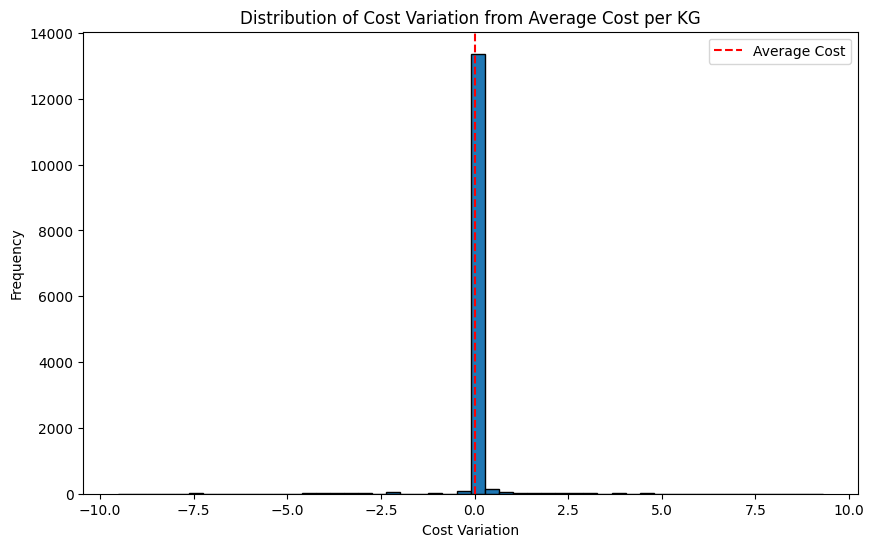

In [49]:
# plot the variation of avg_cost_per_kg
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(inventory_china['COST_VARIATION'], bins=50, edgecolor='black')
plt.title('Distribution of Cost Variation from Average Cost per KG')
plt.xlabel('Cost Variation')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', label='Average Cost')
plt.legend()
plt.show()

In [50]:
# Apply per MATERIAL_NAME group
inventory_singapore_flagged = inventory_singapore.groupby('MATERIAL_NAME', group_keys=False).apply(flag_outliers)

# Get only the clean rows
inventory_clean_singapore = inventory_singapore_flagged[~inventory_singapore_flagged['IS_OUTLIER']].copy()

# Get only the outliers
inventory_outliers_singapore = inventory_singapore_flagged[inventory_singapore_flagged['IS_OUTLIER']].copy()

inventory_singapore = inventory_clean_singapore.copy()

/var/folders/31/0q4j2qxx7yb_s7468v3hrsd40000gn/T/ipykernel_72493/2075230395.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  inventory_singapore_flagged = inventory_singapore.groupby('MATERIAL_NAME', group_keys=False).apply(flag_outliers)


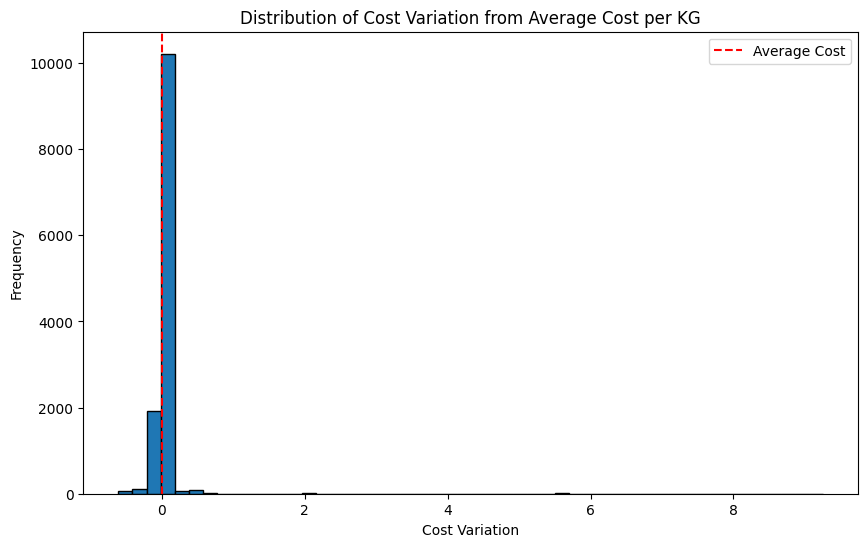

In [51]:
# plot the variation of avg_cost_per_kg
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(inventory_singapore['COST_VARIATION'], bins=50, edgecolor='black')
plt.title('Distribution of Cost Variation from Average Cost per KG')
plt.xlabel('Cost Variation')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', label='Average Cost')
plt.legend()
plt.show()

In [52]:
temp_sg = inventory[(inventory['PLANT_NAME'] == 'SINGAPORE-WAREHOUSE')].copy()

# get all unique materials in temp_sg
unique_materials_sg = temp_sg['MATERIAL_NAME'].unique()

In [53]:
# group all materials and average the cost per kg into a new table
average_cost_per_kg_singapore = inventory_singapore.groupby('MATERIAL_NAME')['AVG_COST_PER_KG'].mean().reset_index()
average_cost_per_kg_singapore.rename(columns={'AVG_COST_PER_KG': 'AVG_COST_PER_KG'}, inplace=True)

avg_sg_unique = average_cost_per_kg_singapore['MATERIAL_NAME']

In [54]:
# compare which material is not in avg_sg_unique from unique_materials_sg
removed_materials_sg = set(unique_materials_sg) - set(avg_sg_unique)
removed_materials_sg = list(removed_materials_sg)
removed_materials_sg.sort()
removed_materials_sg

['MAT-0097']

In [55]:
temp_cn = inventory[(inventory['PLANT_NAME'] == 'CHINA-WAREHOUSE')].copy()

unique_materials_cn = temp_cn['MATERIAL_NAME'].unique()
len(unique_materials_cn)

307

In [56]:
average_cost_per_kg_china = inventory_china.groupby('MATERIAL_NAME')['AVG_COST_PER_KG'].mean().reset_index()
average_cost_per_kg_china.rename(columns={'AVG_COST_PER_KG': 'AVG_COST_PER_KG'}, inplace=True)

avg_cn_unique = average_cost_per_kg_china['MATERIAL_NAME'].unique()

370 - 23.825 -> 23825 --> 7.725  -> usd 1.08
298 - 8.25 -> 8250 --> 1.12 -> usd 0.16
297 - 16.5 -> 16500 --> 6.69 -> 0.93
251 --> 9.61 -> 1.34
238 --> 6.77 -> 0.94
181 --> 6.77 -> 0.94

In [57]:
average_cost_per_kg_china

,MATERIAL_NAME,AVG_COST_PER_KG
0,MAT-0001,12.030177
1,MAT-0002,7.449448
2,MAT-0003,0.809996
3,MAT-0004,9.249840
4,MAT-0005,7.120000
...,...,...
295,MAT-0425,6.011948
296,MAT-0426,7.060000
297,MAT-0428,4.510670
298,MAT-0429,6.450341


In [58]:
average_cost_per_kg_china['AVG_COST_PER_KG_USD'] = average_cost_per_kg_china['AVG_COST_PER_KG'] * 0.139

In [59]:
average_cost_per_kg_china

,MATERIAL_NAME,AVG_COST_PER_KG,AVG_COST_PER_KG_USD
0,MAT-0001,12.030177,1.672195
1,MAT-0002,7.449448,1.035473
2,MAT-0003,0.809996,0.112589
3,MAT-0004,9.249840,1.285728
4,MAT-0005,7.120000,0.989680
...,...,...,...
295,MAT-0425,6.011948,0.835661
296,MAT-0426,7.060000,0.981340
297,MAT-0428,4.510670,0.626983
298,MAT-0429,6.450341,0.896597


In [60]:
average_cost_per_kg_china.to_csv('./data/average_cost_per_kg_china.csv', index=False)

In [61]:
# compare which material is not in avg_sg_unique from unique_materials_sg
removed_materials_cn = set(unique_materials_cn) - set(avg_cn_unique)
removed_materials_cn = list(removed_materials_cn)
removed_materials_cn.sort()
removed_materials_cn

['MAT-0016',
 'MAT-0181',
 'MAT-0238',
 'MAT-0251',
 'MAT-0297',
 'MAT-0298',
 'MAT-0370']

In [62]:
# convert average cost per kg from SGD to USD
average_cost_per_kg_singapore   ['AVG_COST_PER_KG_USD'] = average_cost_per_kg_singapore['AVG_COST_PER_KG'] * 0.79

In [63]:
average_cost_per_kg_singapore[average_cost_per_kg_singapore['MATERIAL_NAME'] == 'MAT-0060']

,MATERIAL_NAME,AVG_COST_PER_KG,AVG_COST_PER_KG_USD


In [64]:
average_cost_per_kg_singapore.to_csv('./data/average_cost_per_kg_singapore.csv', index=False)

In [65]:
# group material_name and show its transportation mode, filter by singapore warehouse
transportation_modes = outbound.groupby('MATERIAL_NAME')['MODE_OF_TRANSPORT'].apply(lambda x: ', '.join(x.unique())).reset_index()
transportation_modes.rename(columns={'MODE_OF_TRANSPORT': 'TRANSPORTATION_MODES'}, inplace=True)


# filter material_name with transportation mode as 'Truck' and 'Marine'
transportation_modes_filtered = transportation_modes[transportation_modes['TRANSPORTATION_MODES'].str.contains('Truck|Marine')].copy()
transportation_modes_filtered

,MATERIAL_NAME,TRANSPORTATION_MODES
0,MAT-0001,Truck
1,MAT-0002,Truck
2,MAT-0003,Truck
3,MAT-0004,Truck
4,MAT-0005,"Truck, Marine"
...,...,...
361,MAT-0426,Marine
362,MAT-0427,Marine
363,MAT-0428,"Truck, Marine"
364,MAT-0429,Truck


In [66]:
transportation_modes_filtered

,MATERIAL_NAME,TRANSPORTATION_MODES
0,MAT-0001,Truck
1,MAT-0002,Truck
2,MAT-0003,Truck
3,MAT-0004,Truck
4,MAT-0005,"Truck, Marine"
...,...,...
361,MAT-0426,Marine
362,MAT-0427,Marine
363,MAT-0428,"Truck, Marine"
364,MAT-0429,Truck


In [67]:
transportation_modes_filtered.to_csv('./data/transportation_modes_filtered.csv', index=False)

In [68]:
transportation_modes_filtered[(transportation_modes_filtered['TRANSPORTATION_MODES'] == 'Truck, Marine') |
                              (transportation_modes_filtered['TRANSPORTATION_MODES'] == 'Marine, Truck')]

# convert all transportation modes to 'Truck, Marine'
transportation_modes_filtered['TRANSPORTATION_MODES'] = transportation_modes_filtered['TRANSPORTATION_MODES'].apply(lambda x: 'Truck, Marine' if 'Truck' in x and 'Marine' in x else x)
transportation_modes_filtered[(transportation_modes_filtered['TRANSPORTATION_MODES'] == 'Truck, Marine')]

,MATERIAL_NAME,TRANSPORTATION_MODES
4,MAT-0005,"Truck, Marine"
5,MAT-0007,"Truck, Marine"
8,MAT-0011,"Truck, Marine"
9,MAT-0012,"Truck, Marine"
11,MAT-0014,"Truck, Marine"
...,...,...
351,MAT-0415,"Truck, Marine"
352,MAT-0416,"Truck, Marine"
357,MAT-0421,"Truck, Marine"
358,MAT-0423,"Truck, Marine"


In [69]:
# replace rows with 'Truck, Marine' with 'Truck'
best_transport = transportation_modes_filtered.copy()
best_transport['TRANSPORTATION_MODES'] = best_transport['TRANSPORTATION_MODES'].replace('Truck, Marine', 'Truck')
best_transport

,MATERIAL_NAME,TRANSPORTATION_MODES
0,MAT-0001,Truck
1,MAT-0002,Truck
2,MAT-0003,Truck
3,MAT-0004,Truck
4,MAT-0005,Truck
...,...,...
361,MAT-0426,Marine
362,MAT-0427,Marine
363,MAT-0428,Truck
364,MAT-0429,Truck


In [70]:
worst_transport = transportation_modes_filtered.copy()
worst_transport['TRANSPORTATION_MODES'] = worst_transport['TRANSPORTATION_MODES'].replace('Truck, Marine', 'Marine')
worst_transport

,MATERIAL_NAME,TRANSPORTATION_MODES
0,MAT-0001,Truck
1,MAT-0002,Truck
2,MAT-0003,Truck
3,MAT-0004,Truck
4,MAT-0005,Marine
...,...,...
361,MAT-0426,Marine
362,MAT-0427,Marine
363,MAT-0428,Marine
364,MAT-0429,Truck


In [71]:
best_transport.to_csv('./data/best_transport.csv', index=False)
worst_transport.to_csv('./data/worst_transport.csv', index=False)